# RECOLTE DES DONNÉES DU CORPUS PAR SCRAPPING

# Documentation :
*  https://medium.com/analytics-vidhya/how-to-scrape-song-lyrics-a-gentle-python-tutorial-5b1d4ab351d2 
*  https://stackoverflow.com/questions/24873773/web-scraping-rap-lyrics-on-rap-genius-w-python 

Une idée préliminaire est de s'inspirer de ce type de travail : https://github.com/Hugo-Nattagh/2017-Hip-Hop 

# Préparation du corpus

In [1]:
# Make HTTP requests
import requests
# Scrape data from an HTML document
from bs4 import BeautifulSoup
# I/O
import os
# Search and manipulate strings
import re

In [ ]:
#GENIUS_API_TOKEN='cle_genius_1'
GENIUS_API_TOKEN='cle_genius_2'

## Utilisation du Package GENIUS

In [ ]:
!pip install lyricsgenius

     |████████████████████████████████| 59 kB 3.0 MB/s 


*Essayons de comprendre le fonctionnement ...*

In [ ]:
import lyricsgenius as genius #calling the API
api=genius.Genius(GENIUS_API_TOKEN)
artist=api.search_artist('Lana Del Rey', max_songs=10)
#artist.save_lyrics(filename='artist.json',overwrite=True,verbose=True)#you can change parameters acording to your needs,i dont recommend using this file directly because it saves a lot of data that you might not need and will take more time to clean it

titles=[song.title for song in artist.songs] #in this case for example i just want title and lyrics
lyrics=[song.lyrics for song in artist.songs]
thingstosave=[]
for i in range(0,len(artist)):
    thingstosave.append((titles[i],lyrics[i]))

Searching for songs by Lana Del Rey...

Song 1: "Young and Beautiful"
Song 2: "Summertime Sadness"
Song 3: "Love"
Song 4: "Lust for Life"
Song 5: "Born to Die"
Song 6: "Video Games"
Song 7: "West Coast"
Song 8: "Norman fucking Rockwell"
Song 9: "​hope is a dangerous thing for a woman like me to have - but i have it"
Song 10: "High By The Beach"

Reached user-specified song limit (10).
Done. Found 10 songs.


Passons maintenant à plus grande échelle !
Nous allons essayer de paralléliser par clef d'api. 

*psst les clés sont confidentielles, fermez les yeux ...*

In [1]:
#Les clés ont été cachées
liste_token = ["cle1",
               "cle2",
               "cle3"]

liste_artiste = ["Bruno Mars","Rihanna","Beyonce","Alicia Keys","Frank Ocean",
                 "Amy Winehouse","Justin Timberlake", "Usher", "Mariah Carey", "Justin Bieber","Michael Jackson",
                 "Christina Aguilera", "Chris Brown", "Ne-Yo", "Destiny's Child", "Aaliyah", "Mary J. Blige",
                 "Marvin Gaye", "Janet Jackson", "Stevie Wonder"]

Nous préparons la trame pour la méthode pool.map.

In [2]:
dico_artiste_token = {liste_token[0] : liste_artiste[:7],
                      liste_token[1] : liste_artiste[7:14],
                      liste_token[2] : liste_artiste[14:]}
dico_artiste_token

{'cle1': ['Bruno Mars',
  'Rihanna',
  'Beyonce',
  'Alicia Keys',
  'Frank Ocean',
  'Amy Winehouse',
  'Justin Timberlake'],
 'cle2': ['Usher',
  'Mariah Carey',
  'Justin Bieber',
  'Michael Jackson',
  'Christina Aguilera',
  'Chris Brown',
  'Ne-Yo'],
 'cle3': ["Destiny's Child",
  'Aaliyah',
  'Mary J. Blige',
  'Marvin Gaye',
  'Janet Jackson',
  'Stevie Wonder']}

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import json

def telecharger_paroles(api,artiste):
  dico_artiste = {}
  artiste_info=api.search_artist(artiste, max_songs=200)
  dico_artiste = {song.title : song.lyrics for song in artiste_info.songs}
  nom_fichier = artiste.replace(" ","_").replace(",","").replace("&","").replace("-"," ") + ".txt"
  with open(nom_fichier, 'w') as outfile:
    json.dump(dico_artiste, outfile)
  return dico_artiste

data_json = {}
def connect_api(Token,artistes):
  api=genius.Genius(Token,timeout=20, retries=5)
  for artiste in artistes[Token]:
    dico_artiste = telecharger_paroles(api,artiste)
    data_json[artiste] = dico_artiste

with ThreadPoolExecutor(3) as pool:
  values = pool.map(lambda x : connect_api(x,dico_artiste_token),liste_token)

with open("full_data.txt", 'w') as outfile:
    json.dump(data_json, outfile)

Searching for songs by Bruno Mars...

Searching for songs by Usher...

Searching for songs by Destiny's Child...

Changing artist name to 'Destiny’s Child'
Song 1: "Say My Name"
Song 2: "Survivor"
Song 1: "Climax"
Song 3: "Dangerously in Love"
Song 1: "That’s What I Like"
Song 2: "Yeah!"
Song 4: "Cater 2 U"
Song 3: "Burn"
Song 5: "Soldier"
Song 2: "Finesse (Remix)"
Song 3: "Versace on the Floor"
Song 6: "Independent Women - Part 1"
Song 7: "Bills, Bills, Bills"
Song 4: "I Don’t Mind"
Song 8: "Bootylicious"
Song 9: "Jumpin, Jumpin’"
Song 5: "Confessions Part II"
Song 4: "24K Magic"
Song 10: "Emotion"
Song 6: "No Limit"
Song 11: "Girl"
Song 7: "U Got It Bad"
Song 12: "Brown Eyes"
Song 13: "8 Days of Christmas"
Song 5: "When I Was Your Man"
Song 8: "Rivals"
Song 14: "If"
Song 15: "Lose My Breath"
Song 9: "Good Kisser"
Song 6: "Locked Out of Heaven"
Song 16: "Bug a Boo"
Song 17: "So Good"
Song 18: "No No No, Part 1"
Song 10: "Confessions Part I"
Song 19: "Nasty Girl"
Song 20: "Is She the R

## PREPROCESSING

In [4]:
import nltk
nltk.download('wordnet')
import json
import nltk
import re
from unidecode import unidecode

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
stm = PorterStemmer()
with open("full_data.json",encoding="utf-8") as f:
    data = json.load(f)
from string import punctuation

data ={cle:val for cle, val in data.items()}

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
[len(val) for cle, val in data.items()]

[172,
 200,
 119,
 116,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 167,
 200,
 142,
 200]

In [3]:
[cle for cle, val in data.items()]

["Destiny's Child",
 'Usher',
 'Bruno Mars',
 'Aaliyah',
 'Mariah Carey',
 'Rihanna',
 'Mary J. Blige',
 'Justin Bieber',
 'Beyonce',
 'Marvin Gaye',
 'Janet Jackson',
 'Alicia Keys',
 'Michael Jackson',
 'Frank Ocean',
 'Christina Aguilera',
 'Stevie Wonder',
 'Amy Winehouse',
 'Chris Brown',
 'Justin Timberlake',
 'Ne-Yo']

In [5]:
x = [valeur for valeur in data.values()]
z = [list(valeur.values()) for valeur in x]

sub_dico_for_title_song = [list(valeur.keys()) for valeur in x]



X = [item for sublist in z for item in sublist]
title_song_tool = [item for sublist in sub_dico_for_title_song for item in sublist]


title_song_tool ={ i:clé for i,clé in enumerate(title_song_tool)}
print(len(title_song_tool))
y = [i*[cle] for i,cle in zip(map(lambda x : len(x),data.values()),data.keys())]
Y = [item for sublist in y for item in sublist]

3716


In [6]:
len({cle:value for cle, value in title_song_tool.items() if "remix" not in value.lower()})

3442

In [7]:
def cleaner(chanson):
    old_new = [
        (r"\n"," "),
        (r"n't", " not"),
        (r"[Ii]'m", "i am"),
        (r"'"," "),
        (r"\?"," "),
        (r"\[.*?\]"," "),
        (r","," "),
        (r"\("," "),
        (r"\)"," "),
        (r"\d*EmbedShare.*"," "),
        (r"EmbedCopy"," "),
        (r" \s+"," ")
        ]
    for old,new in old_new:
        chanson = re.sub(old,new,chanson)
    for punc in punctuation:
        chanson = chanson.replace(punc," ")
    chanson = re.sub(r" \s+"," ",chanson)
    return unidecode(chanson).lower().strip()

values = map(cleaner,X)
values = list(values)

who_do_we_remove = {idx:(Y[idx],title_song_tool[idx]) for idx,valeur in enumerate(values) if len(valeur) <= 20 or "remix" in title_song_tool[idx].lower()}
print(len(who_do_we_remove))

304


In [27]:
list(who_do_we_remove.keys())

[31,
 33,
 49,
 56,
 60,
 76,
 81,
 85,
 93,
 109,
 114,
 128,
 129,
 147,
 153,
 154,
 159,
 161,
 163,
 165,
 168,
 170,
 203,
 210,
 220,
 227,
 228,
 239,
 259,
 269,
 306,
 312,
 320,
 325,
 328,
 344,
 359,
 365,
 373,
 391,
 404,
 405,
 410,
 416,
 427,
 429,
 432,
 433,
 452,
 460,
 463,
 469,
 470,
 472,
 476,
 478,
 480,
 482,
 483,
 487,
 488,
 508,
 535,
 544,
 548,
 562,
 564,
 566,
 567,
 569,
 570,
 572,
 577,
 586,
 589,
 595,
 615,
 629,
 642,
 643,
 644,
 646,
 647,
 648,
 659,
 661,
 666,
 685,
 711,
 715,
 720,
 730,
 748,
 763,
 772,
 775,
 776,
 778,
 780,
 790,
 823,
 830,
 854,
 861,
 903,
 905,
 907,
 913,
 915,
 919,
 921,
 922,
 925,
 940,
 943,
 947,
 956,
 966,
 970,
 973,
 975,
 977,
 979,
 981,
 982,
 985,
 987,
 988,
 990,
 992,
 994,
 995,
 996,
 997,
 999,
 1001,
 1002,
 1005,
 1006,
 1027,
 1032,
 1044,
 1046,
 1068,
 1075,
 1077,
 1079,
 1093,
 1099,
 1104,
 1110,
 1115,
 1137,
 1141,
 1152,
 1161,
 1181,
 1195,
 1205,
 1245,
 1258,
 1266,
 1273,
 12

In [28]:
Y  = [artist for i,artist in  enumerate(Y) if i not in who_do_we_remove.keys()]
X  = [lyrics for i,lyrics in  enumerate(values) if i not in who_do_we_remove.keys()]

title_song_tool = {cle:valeur for cle, valeur in title_song_tool.items() if cle not in list(who_do_we_remove.keys())}
## On vérifie que ca a bien supprimé

title_song_tool = {idx:valeur for idx, valeur in enumerate(list(title_song_tool.values()))}
print(len(title_song_tool))
{idx:(Y[idx],title_song_tool[idx]) for idx,valeur in enumerate(X) if len(valeur) <= 20}

3412


{}

In [29]:
from english_words import english_words_lower_alpha_set

from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
english_stopwords

print(dict_words)
def fun(liste):
  listeintern = [stm.stem(i) for i in liste]
  return listeintern
  
X = [fun(i.split(" ")) for i in X]

{'d': 159980, 'a': 372701, 'r': 208846, 'k': 67290, 'c': 85995, 'h': 265587, 'i': 333897, 'l': 210395, ' ': 1350735, '9': 170, 's': 227175, 'y': 208366, 'm': 149074, 'n': 320728, 'e': 532582, 'f': 70149, 'o': 485622, 'u': 190239, '"': 203, 'b': 93446, 'v': 55976, 't': 406540, 'g': 119006, 'w': 131394, 'p': 54787, 'j': 11814, 'q': 1909, 'z': 3018, 'x': 3424, '8': 109, '0': 519, '5': 206, '-': 414, '1': 473, '2': 496, '7': 108, '6': 110, '4': 412, '3': 248, "'": 4120, '.': 219, '?': 13, '\n': 2, '!': 5, '(': 2, '/': 1, ',': 5, ')': 1, '~': 1}


In [30]:
sum([len(i) for i in X])

1354147

In [31]:
len(english_words_lower_alpha_set)
from sklearn.feature_extraction.text import TfidfVectorizer # ou CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(ngram_range=(1, 2),stop_words = english_stopwords,
                            use_idf=True, smooth_idf=True, # idf lissé
                            sublinear_tf=False, norm='l2',analyzer = 'word',tokenizer=dummy_fun,preprocessor = dummy_fun)

In [67]:
dtm = vectorizer.fit_transform(X)
dtm.shape


(3412, 206560)

In [33]:
import pandas as pd
pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names_out())

,,,3/4,citi,come,eff,element,ooh,shit,shot,...,zoom streetlight,zoom toward,zoom zoom,zumba,zumba poquito,zumba we'r,zz,zz bee,zz come,zz zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
dtm.shape;len(Y)

3412

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline

x_train,x_test,y_train,y_test = train_test_split(dtm,Y,test_size = 0.33)

x_train = x_train
x_test = x_test

In [36]:
x_train

<2286x206560 sparse matrix of type '<class 'numpy.float64'>'
	with 427388 stored elements in Compressed Sparse Row format>

In [37]:
MultinomialNB().get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [45]:
import numpy as np

mod= MultinomialNB()

Parameter = {
    "alpha": list(np.linspace(0.01,0.03,50)),
    "fit_prior" : [True, False],

}
grid = GridSearchCV(mod,Parameter,verbose=2,scoring = "roc_auc_ovr_weighted")
grid.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.010408163265306122, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.010408163265306122, 

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.010408163265306122,
                                   0.010816326530612244, 0.011224489795918367,
                                   0.01163265306122449, 0.012040816326530613,
                                   0.012448979591836735, 0.012857142857142857,
                                   0.013265306122448979, 0.013673469387755103,
                                   0.014081632653061223, 0.014489795918367347,
                                   0.01489795918367347, 0.015306122448979591,
                                   0.015714285714...36,
                                   0.01653061224489796, 0.01693877551020408,
                                   0.017346938775510204, 0.017755102040816324,
                                   0.018163265306122448, 0.018571428571428572,
                                   0.018979591836734692, 0.019387755102040816,
                                   0.01979591836734694,

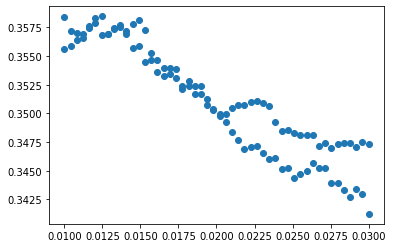

In [46]:
import matplotlib.pyplot as plt

plt.scatter(y= grid.cv_results_["mean_test_score"], x = grid.cv_results_["param_alpha"].data)



In [47]:
grid.best_params_

{'alpha': 0.012448979591836735, 'fit_prior': False}

In [48]:
prediction = grid.predict(x_test)

print("Number of mislabeled points out of a total %d points : %d, that is %.3f of well-labeled points" % (x_test.shape[0], (y_test != prediction).sum(),(1-(y_test != prediction).sum()/x_test.shape[0])))

Number of mislabeled points out of a total 1126 points : 693, that is 0.385 of well-labeled points


In [49]:
prediction

array(['Frank Ocean', 'Chris Brown', 'Mariah Carey', ..., 'Mary J. Blige',
       'Mary J. Blige', 'Marvin Gaye'], dtype='<U18')

# A qui le texte d'adèle ressemble le plus ?

Nous avons récupéré des textes d'artistes (non-présents et non-présentes dans les données d'entrainement) pour voir vers quel artiste (présents et présentes dans les données d'entrainement) le texte se rapproche le plus.

## "Hello" de Adèle

In [7]:
lyrics = """Hello, it's me I was wondering if after all these years you'd like to meet To go over everything 
They say that time's supposed to heal ya But I ain't done much healing 
Hello, can you hear me? I'm in California dreaming about who we used to be
When we were younger and free 
I've forgotten how it felt before the world fell at our feet
There's such a difference between us
And a million miles
Hello from the other side
I must've called a thousand times
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home
Hello from the outside
At least I can say that I've tried
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore
Hello, how are you?
It's so typical of me to talk about myself, I'm sorry
I hope that you're well
Did you ever make it out of that town where nothing ever happened?
It's no secret that the both of us are running out of time
So hello from the other side (Other side)
I must've called a thousand times (Thousand times)
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home
Hello from the outside (Outside)
At least I can say that I've tried (I've tried)
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore
Ooh-ooh, anymore
Ooh-ooh-ooh, anymore
Ooh-ooh, anymore
Anymore
Hello from the other side (Other side)
I must've called a thousand times (Thousand times)
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home
Hello from the outside (Outside)
At least I can say that I've tried (I've tried)
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore"""

lyrics = [cleaner(lyrics).split(" ")]

lyrics_dtm = vectorizer.transform(lyrics)
who_does_adele_sound_like = grid.predict_proba(lyrics_dtm)
pd.DataFrame({"artiste":grid.classes_,"probabilité":who_does_adele_sound_like[0]}).sort_values(by = "probabilité",ascending = False).head()

,artiste,probabilité
9,Usher,0.243921
4,Christina Aguilera,0.239250
2,Beyonce,0.158602
6,Michael Jackson,0.082022
0,Alicia Keys,0.070738


## "What a wonderful world" de Louis Armstrong

In [6]:
lyrics = """
I see trees of green, red roses too
I see them bloom for me and you
And I think to myself what a wonderful world.
I see skies of blue and clouds of white
The bright blessed day, the dark sacred night
And I think to myself what a wonderful world.
The colors of the rainbow so pretty in the sky
Are also on the faces of people going by
I see friends shaking hands saying how do you do
They're really saying I love you.
I hear babies crying, I watch them grow
They'll learn much more than I'll never know
And I think to myself what a wonderful world
Yes I think to myself what a wonderful world.
"""

lyrics = [cleaner(lyrics).split(" ")]

lyrics_dtm = vectorizer.transform(lyrics)
who_does_adele_sound_like = grid.predict_proba(lyrics_dtm)
pd.DataFrame({"artiste":grid.classes_,"probabilité":who_does_adele_sound_like[0]}).sort_values(by = "probabilité",ascending = False).head(5)

,artiste,probabilité
8,Stevie Wonder,0.492591
2,Beyonce,0.101640
0,Alicia Keys,0.081755
7,Rihanna,0.081540
4,Christina Aguilera,0.058850


# 10 Classes

Nous avons ensuite regardé si les performances de notre modèle augmentait en réduisant le nombre de classes à prédire (et donc le nombre d'artistes).

In [3]:
artistes_10classes = ['Bruno Mars',
                      'Rihanna',
                      'Justin Bieber',
                      'Beyonce',
                      'Alicia Keys',
                      'Michael Jackson',
                      'Christina Aguilera',
                      'Stevie Wonder',
                      'Amy Winehouse',
                      'Usher']

import nltk
nltk.download('wordnet')
import json
import nltk
import re
from unidecode import unidecode

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
stm = PorterStemmer()
with open("full_data.json",encoding="utf-8") as f:
    data = json.load(f)
from string import punctuation

data = {cle:val for cle, val in data.items() if cle in artistes_10classes}

x = [valeur for valeur in data.values()]
z = [list(valeur.values()) for valeur in x]

sub_dico_for_title_song = [list(valeur.keys()) for valeur in x]



X = [item for sublist in z for item in sublist]
title_song_tool = [item for sublist in sub_dico_for_title_song for item in sublist]


title_song_tool ={ i:clé for i,clé in enumerate(title_song_tool)}
y = [i*[cle] for i,cle in zip(map(lambda x : len(x),data.values()),data.keys())]
Y = [item for sublist in y for item in sublist]

#Cleaner
def cleaner(chanson):
    old_new = [
        (r"\n"," "),
        (r"n't", " not"),
        (r"[Ii]'m", "i am"),
        (r"'"," "),
        (r"\?"," "),
        (r"\[.*?\]"," "),
        (r","," "),
        (r"\("," "),
        (r"\)"," "),
        (r"\d*EmbedShare.*"," "),
        (r"EmbedCopy"," "),
        (r" \s+"," ")
        ]
    for old,new in old_new:
        chanson = re.sub(old,new,chanson)
    for punc in punctuation:
        chanson = chanson.replace(punc," ")
    chanson = re.sub(r" \s+"," ",chanson)
    return unidecode(chanson).lower().strip()

values = map(cleaner,X)
values = list(values)

who_do_we_remove = {idx:(Y[idx],title_song_tool[idx]) for idx,valeur in enumerate(values) if len(valeur) <= 20 or "remix" in title_song_tool[idx].lower()}
print(len(who_do_we_remove))


Y  = [artist for i,artist in  enumerate(Y) if i not in who_do_we_remove.keys()]
X  = [lyrics for i,lyrics in  enumerate(values) if i not in who_do_we_remove.keys()]

title_song_tool = {cle:valeur for cle, valeur in title_song_tool.items() if cle not in list(who_do_we_remove.keys())}
## On vérifie que ca a bien supprimé

title_song_tool = {idx:valeur for idx, valeur in enumerate(list(title_song_tool.values()))}
print(len(title_song_tool))
{idx:(Y[idx],title_song_tool[idx]) for idx,valeur in enumerate(X) if len(valeur) <= 20}

from english_words import english_words_lower_alpha_set

from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
english_stopwords

def fun(liste):
  listeintern = [stm.stem(i) for i in liste]
  return listeintern

X = [fun(i.split(" ")) for i in X]

len(english_words_lower_alpha_set)
from sklearn.feature_extraction.text import TfidfVectorizer # ou CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(ngram_range=(1, 2),stop_words = english_stopwords,
                            use_idf=True, smooth_idf=True, # idf lissé
                            sublinear_tf=False, norm='l2',analyzer = 'word',tokenizer=dummy_fun,preprocessor = dummy_fun)

dtm = vectorizer.fit_transform(X)
dtm.shape

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline

x_train,x_test,y_train,y_test = train_test_split(dtm,Y,test_size = 0.33)

x_train = x_train
x_test = x_test

import numpy as np

mod= MultinomialNB()

Parameter = {
    "alpha": list(np.linspace(0.01,0.03,50)),
    "fit_prior" : [True, False],

}
grid = GridSearchCV(mod,Parameter,verbose=2,scoring = "roc_auc_ovr_weighted")
grid.fit(x_train,y_train)

prediction = grid.predict(x_test)

print("Number of mislabeled points out of a total %d points : %d, that is %.3f of well-labeled points" % (x_test.shape[0], (y_test != prediction).sum(),(1-(y_test != prediction).sum()/x_test.shape[0])))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1886
152
1734


C:\Users\franc\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.01, fit_prior=True; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END ........................alpha=0.01, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.010408163265306122, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.010408163265306122, 

[CV] END .........alpha=0.014081632653061223, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.014081632653061223, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.014081632653061223, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.014081632653061223, fit_prior=True; total time=   0.0s
[CV] END ........alpha=0.014081632653061223, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.014081632653061223, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.014081632653061223, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.014081632653061223, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.014081632653061223, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.014489795918367347, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.014489795918367347, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.014489795918367347, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.01

[CV] END .........alpha=0.018163265306122448, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.018163265306122448, fit_prior=True; total time=   0.0s
[CV] END ........alpha=0.018163265306122448, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.018163265306122448, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.018163265306122448, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.018163265306122448, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.018163265306122448, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.018571428571428572, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.018571428571428572, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.018571428571428572, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.018571428571428572, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.018571428571428572, fit_prior=True; total time=   0.0s
[CV] END ........alpha=0.018

[CV] END ........alpha=0.022244897959183673, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.022244897959183673, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.022653061224489797, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.022653061224489797, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.022653061224489797, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.022653061224489797, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.022653061224489797, fit_prior=True; total time=   0.0s
[CV] END ........alpha=0.022653061224489797, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.022653061224489797, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.022653061224489797, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.022653061224489797, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.022653061224489797, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.02

[CV] END .........alpha=0.026734693877551022, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.026734693877551022, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.026734693877551022, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.026734693877551022, fit_prior=True; total time=   0.0s
[CV] END ........alpha=0.026734693877551022, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.026734693877551022, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.026734693877551022, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.026734693877551022, fit_prior=False; total time=   0.0s
[CV] END ........alpha=0.026734693877551022, fit_prior=False; total time=   0.0s
[CV] END .........alpha=0.027142857142857142, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.027142857142857142, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.027142857142857142, fit_prior=True; total time=   0.0s
[CV] END .........alpha=0.02

On passe d'une exactitude de 0.385 à 0.457